<!-- This section contains the code for R, G, B seperation -->

In [12]:
import matplotlib.pyplot as mtpplt
from improc.utils import split_img_channels
import numpy as np

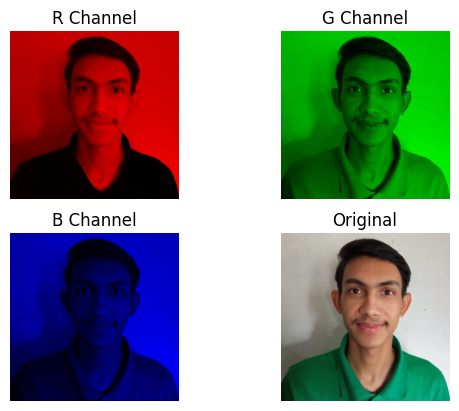

In [20]:
img_path = "../assets/images/rt.jpg"
channel_list = split_img_channels(img_path)
channel_title = ["R", "G", "B"]

mtpplt.figure()
for i in range(len(channel_list)):
    mtpplt.subplot(2, 2, i + 1)
    mtpplt.imshow(channel_list[i])
    mtpplt.axis('off')
    mtpplt.title(channel_title[i] + " Channel")

mtpplt.subplot(2, 2, len(channel_list) + 1)
mtpplt.imshow(mtpplt.imread(img_path))
mtpplt.axis('off')
mtpplt.title("Original")

# saving to output dir
save_path = "../assets/output/RGB-Seperate.png"
mtpplt.savefig(save_path)

mtpplt.show()

<!-- This section contains the code for RGB to Gray Scale -->

<!-- This section contains the RGB to Grayscale -->

In [1]:
import numpy as np
from improc.utils import pixel_iterator
import matplotlib.pyplot as mtpplt

In [2]:
average = lambda pixel: sum(pixel) / len(pixel)
weighted_avg = lambda pixel, weights: average([pixel[i] * weights[i] for i in range(len(pixel))])

In [3]:
def simple_average(pixel) -> np.ndarray:
    return average(pixel)

ntsc_weight = [0.299, 0.587, 0.114]
def ntsc_average(pixel) -> np.ndarray:
    return weighted_avg(pixel, ntsc_weight)

lum_weight = [0.2126, 0.7152, 0.0722]
def lum_average(pixel) -> np.ndarray:
    return weighted_avg(pixel, lum_weight)

In [4]:
img_path = "../assets/images/rt.jpg"
img = np.array(mtpplt.imread(img_path))

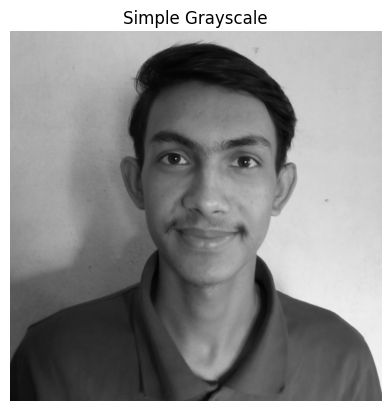

In [7]:
# simple average
simple_result = img.copy()
pixel_iterator(img, simple_average, simple_result)
mtpplt.title("Simple Grayscale")
mtpplt.axis('off')
mtpplt.imshow(simple_result)
mtpplt.show()

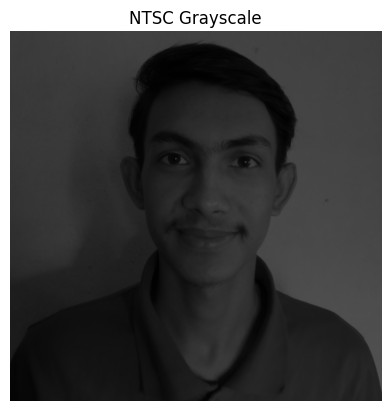

In [8]:
# ntsc weighted average
ntsc_result = img.copy()
pixel_iterator(img, ntsc_average, ntsc_result)
mtpplt.title("NTSC Grayscale")
mtpplt.axis('off')
mtpplt.imshow(ntsc_result)
mtpplt.show()

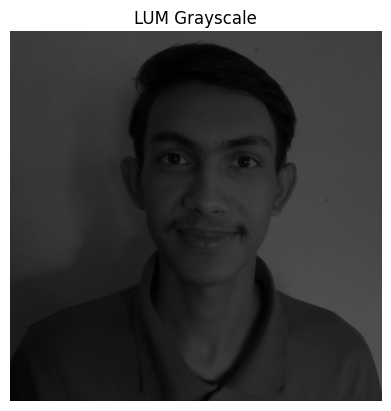

In [10]:
# luminosity method weighted average
lum_result = img.copy()
pixel_iterator(img, lum_average, lum_result)
mtpplt.title("LUM Grayscale")
mtpplt.axis('off')
mtpplt.imshow(lum_result)
mtpplt.show()

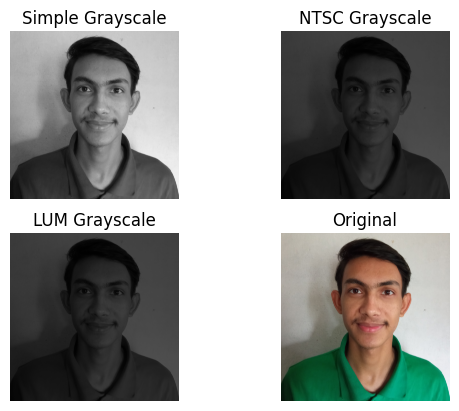

In [19]:
mtpplt.figure()
result_list = [simple_result, ntsc_result, lum_result]
result_title = ["Simple", "NTSC", "LUM"]

for i in range(len(result_list)):
    mtpplt.subplot(2, 2, i + 1)
    mtpplt.imshow(result_list[i])
    mtpplt.axis('off')
    mtpplt.title(result_title[i] + " Grayscale")

mtpplt.subplot(2, 2, len(result_list) + 1)
mtpplt.imshow(img)
mtpplt.axis('off')
mtpplt.title("Original")

# to save in output dir
save_path = "../assets/output/RGB-Grayscale.png"
mtpplt.savefig(save_path)

mtpplt.show()